In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Syneromics plots

In [54]:
synergies = pd.read_csv("syn_results/final_results.tsv", sep='\t')

In [55]:
synergies.snps.drop_duplicates()

0                     P31150.GDIA_HUMAN*P35606.COPB2_HUMAN
1                     P09211.GSTP1_HUMAN*P12694.ODBA_HUMAN
2                    Q8NC56.LEMD2_HUMAN*Q9Y394.DHRS7_HUMAN
3                    Q00653.NFKB2_HUMAN*Q8N6M0.OTU6B_HUMAN
4                    O94973.AP2A2_HUMAN*P52926.HMGA2_HUMAN
                               ...                        
33542    Q01658.NC2B_HUMAN*Q06265.EXOS9_HUMAN*Q12769.NU...
33543    P54727.RD23B_HUMAN*P63220.RS21_HUMAN*Q9BV86.NT...
33544    O94906.PRP6_HUMAN*Q7-76E.9RBBP6_HUMAN*Q9BXW7.H...
33545    O43172.PRP4_HUMAN*P41091.IF2G_HUMAN*Q8IY18.SMC...
33546    P08236.BGLR_HUMAN*P16104.H2AX_HUMAN*Q13243.SRS...
Name: snps, Length: 33431, dtype: object

In [56]:
synergies

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
0,PdbbfaGDIAHUMAN:PdfgagCOPBcHUMAN,-0.150755,0.079,-1.901054,0.058276,-0.306826,0.005316,297,0.070172,True,P31150.GDIA_HUMAN*P35606.COPB2_HUMAN,2,1
1,PajcbbGSTPbHUMAN:PbcgjeODBAHUMAN,-0.022020,0.035,-0.620554,0.535375,-0.091857,0.047817,297,0.029794,True,P09211.GSTP1_HUMAN*P12694.ODBA_HUMAN,2,1
2,QiNCfgLEMDcHUMAN:QjYdjeDHRShHUMAN,-0.071444,0.033,-2.139794,0.033197,-0.137155,-0.005733,297,0.031933,True,Q8NC56.LEMD2_HUMAN*Q9Y394.DHRS7_HUMAN,2,1
3,QaagfdNFKBcHUMAN:QiNgMaOTUgBHUMAN,0.048440,0.029,1.693971,0.091334,-0.007839,0.104718,297,0.103401,True,Q00653.NFKB2_HUMAN*Q8N6M0.OTU6B_HUMAN,2,1
4,OjejhdAPcAcHUMAN:PfcjcgHMGAcHUMAN,-0.012088,0.026,-0.464256,0.642809,-0.063334,0.039157,297,0.045419,True,O94973.AP2A2_HUMAN*P52926.HMGA2_HUMAN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33542,QabgfiNCcBHUMAN:QagcgfEXOSjHUMAN:QbchgjNUbgaHU...,0.001994,0.003,0.605138,0.545561,-0.004491,0.008479,297,0.039636,True,Q01658.NC2B_HUMAN*Q06265.EXOS9_HUMAN*Q12769.NU...,4,5
33543,PfehchRDcdBHUMAN:PgdccaRScbHUMAN:QjBVigNTMbAHU...,0.001071,0.001,1.576657,0.115965,-0.000266,0.002408,297,0.063905,True,P54727.RD23B_HUMAN*P63220.RS21_HUMAN*Q9BV86.NT...,4,5
33544,OjejagPRPgHUMAN:QhZgEjRBBPgHUMAN:QjBXWhHDHDfHU...,0.000541,0.001,0.582795,0.560484,-0.001287,0.002370,297,0.009098,True,O94906.PRP6_HUMAN*Q7-76E.9RBBP6_HUMAN*Q9BXW7.H...,4,5
33545,OedbhcPRPeHUMAN:PebajbIFcGHUMAN:QiIYbiSMCfHUMA...,0.001865,0.003,0.653422,0.514002,-0.003752,0.007481,297,0.080539,True,O43172.PRP4_HUMAN*P41091.IF2G_HUMAN*Q8IY18.SMC...,4,5


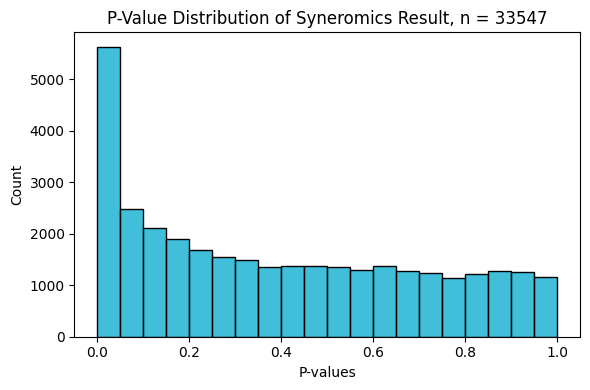

In [57]:
plt.rcParams['figure.figsize']=(6,4)
hist = sns.histplot(synergies, x='P>|z|', bins=20, color='#00A9CE')
hist.set(xlabel="P-values", title=f"P-Value Distribution of Syneromics Result, n = {len(synergies.coef_id)}")
plt.savefig('img/p-value.png')
plt.show()

In [58]:
sum(synergies['P>|z|'] == 0.0)

0

In [59]:
del synergies

### Explainability plots

In [60]:
models = pd.read_csv("exp_results/combined_models.tsv", sep='\t')

In [61]:
syn_mask = models.coef_id.str.contains(':')

In [62]:
synergies = models[syn_mask]
synergies = synergies[synergies.order == 4]
synergies.config.value_counts()

config
a: 0.05 f: 0       1181
a: 0.01 f: 0        402
a: 0.05 f: 0.5      117
a: 0.001 f: 0        88
a: 0.01 f: 0.5       41
a: 0.001 f: 0.5       6
Name: count, dtype: int64

In [63]:
n = synergies.config.value_counts()

In [64]:
csiro_palette = ['#00B0F0', '#00A9CE', '#007377', '#1E22AA', '#6D2077']

sns.set_palette(palette=csiro_palette)

In [65]:
model_4 = models[models.order ==4]

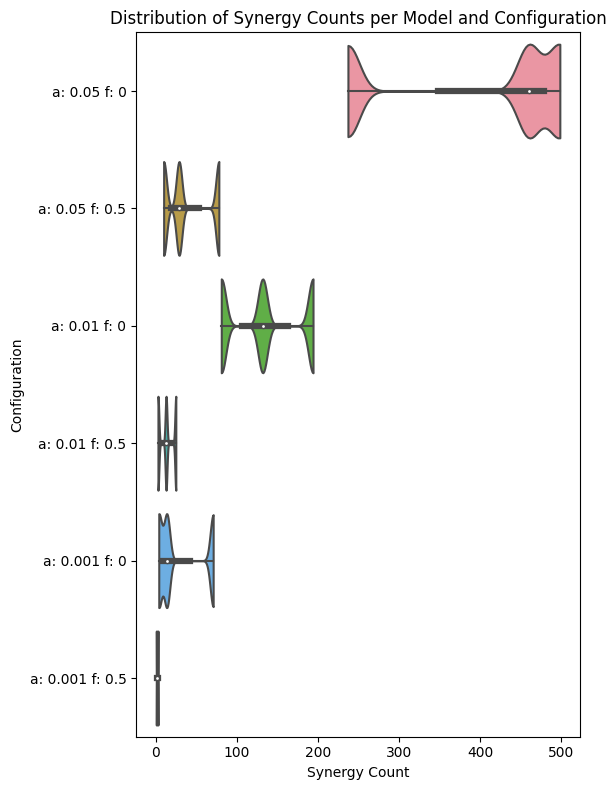

In [66]:
plt.rcParams['figure.figsize']=(6,8)
plt.rcParams['figure.autolayout'] = True

plot = sns.violinplot(model_4[["drug","n_syn","config"]].drop_duplicates(), x="n_syn", y="config",orient="h", cut=0, scale="width", bw=0.1)
plot.set_title("Distribution of Synergy Counts per Model and Configuration")
plot.set(xlabel="Synergy Count", ylabel="Configuration")
plot.set_yticks(range(len(n)))
# plot.set_yticklabels([f'alpha: 0.05 \n filter: 0 \n n = {n[0]}', f'alpha: 0.05 \n filter: 0.5 \n n = {n[2]}', f'alpha: 0.01 \n filter: 0 \n n = {n[1]}', f'alpha: 0.01 \n filter: 0.5 \n n = {n[3]}'])
plt.savefig('img/synergy_count.png')
plt.show()

In [67]:
len(set(models.drug))

3

In [68]:
models.drug.value_counts()

drug
5    3793
1    3296
3    1939
Name: count, dtype: int64

In [21]:
na_count = pd.read_csv("data/missing_counts.csv", index_col=0)
na_count

,0
P37108.SRP14_HUMAN,0
Q96JP5.ZFP91_HUMAN,309
Q9Y4H2.IRS2_HUMAN,764
P36578.RL4_HUMAN,0
Q6SPF0.SAMD1_HUMAN,214
...,...
Q7Z3B1.NEGR1_HUMAN,844
O60669.MOT2_HUMAN,890
Q13571.LAPM5_HUMAN,906
Q96JM2.ZN462_HUMAN,831


In [22]:
na_count.index = [''.join([chr(int(y)+97) if y.isnumeric() else y for y in x.replace('_','').replace('.','')]) for x in na_count.index]

In [24]:
na_count["higher"] = na_count.iloc[:,0].apply(lambda x: x > 950/2)
bad_prot = na_count.index[na_count.higher]

In [25]:
model_4["missing"] = model_4.coef_id.apply(lambda x: x in bad_prot)

C:\Users\wen068\AppData\Local\Temp\ipykernel_18676\3879356855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_4["missing"] = model_4.coef_id.apply(lambda x: x in bad_prot)


<Axes: xlabel='n_obs', ylabel='pearsonR'>

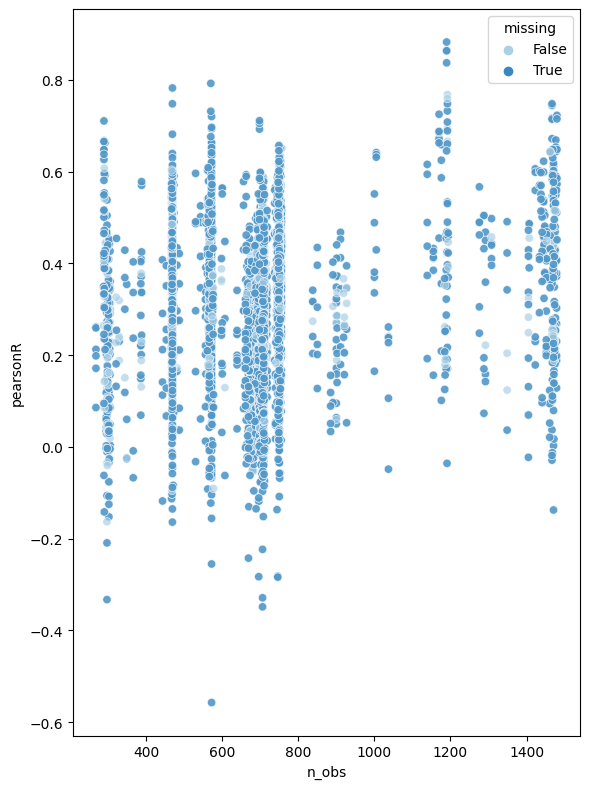

In [26]:
sns.scatterplot(model_4[["drug", "n_obs", "pearsonR", "missing"]].drop_duplicates(), x="n_obs", y="pearsonR", alpha=0.7, hue="missing", palette="Blues")

In [32]:
del models

In [69]:
performance = pd.read_csv("exp_results/combined_performances.tsv", sep='\t')

In [70]:
performance

,train_pseudo_r2,train_adj_r2,train_MSE,MSE,train_pearsonR,pearsonR,drug,order,config
0,1.000000,NaN,7.728072e-28,6.180465,1.000000,-0.061288,1,1,a: 0.05 f: 0
1,1.000000,NaN,1.630690e-28,4.652836,1.000000,-0.036014,1,2,a: 0.05 f: 0
2,1.000000,NaN,1.183549e-28,4.600416,1.000000,-0.033854,1,4,a: 0.05 f: 0
3,0.156940,0.099112,8.998482e-01,1.849859,0.396156,0.192993,1,1,a: 0.05 f: 0.5
4,0.386382,0.319734,6.549508e-01,2.341991,0.621596,-0.115532,1,2,a: 0.05 f: 0.5
5,0.386382,0.319734,6.549508e-01,2.341991,0.621596,-0.115532,1,4,a: 0.05 f: 0.5
6,0.667980,0.344813,3.543851e-01,2.316528,0.817300,0.222547,1,1,a: 0.01 f: 0
7,1.000000,NaN,2.156954e-27,9.636281,1.000000,0.340931,1,2,a: 0.01 f: 0
8,1.000000,NaN,2.552305e-27,9.725728,1.000000,0.339500,1,4,a: 0.01 f: 0
9,0.090084,0.071258,9.712071e-01,1.771679,0.300140,0.229794,1,1,a: 0.01 f: 0.5


In [71]:
performance[["config", "order"]].value_counts()

config           order
a: 0.001 f: 0    1        3
                 2        3
a: 0.05 f: 0.5   2        3
                 1        3
a: 0.05 f: 0     4        3
                 2        3
                 1        3
a: 0.01 f: 0.5   4        3
                 2        3
                 1        3
a: 0.01 f: 0     4        3
                 2        3
                 1        3
a: 0.001 f: 0.5  4        3
                 2        3
                 1        3
a: 0.001 f: 0    4        3
a: 0.05 f: 0.5   4        3
Name: count, dtype: int64

In [36]:
n = performance.config.value_counts()

In [37]:
no_nan = performance.dropna()

In [72]:
rf = pd.read_csv("syn_results/tree_performances.tsv", sep='\t')

In [73]:
rf["config"] = "rf"
rf["order"] = 1

In [74]:
combine = pd.concat([performance, rf], ignore_index=True)

In [75]:
n = pearsonR.count()
n

order
1    3602
2    3597
4    3597
dtype: int64

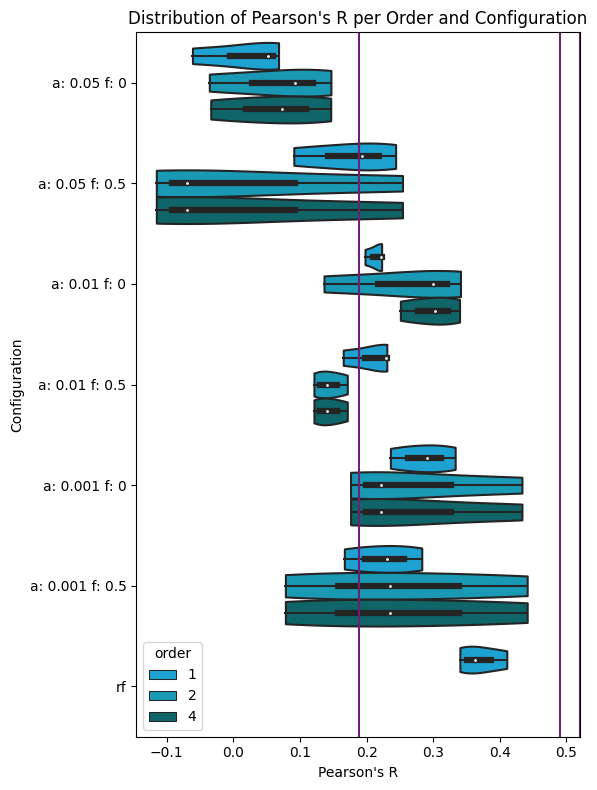

In [76]:
plt.rcParams['figure.figsize']=(6,8)
plt.rcParams['figure.autolayout'] = True
violin = sns.violinplot(combine, x="pearsonR", y="config", hue="order", orient="h", cut=0, scale="count")
plt.axvline(0.49, 0, c="#6D2077")
plt.axvline(0.52, 0, c="#6D2077")
plt.axvline(combine.pearsonR.mean(), 0, c="#6D2077")
violin.set_title("Distribution of Pearson's R per Order and Configuration")
violin.set(xlabel="Pearson's R", ylabel="Configuration")
# violin.set_yticks(range(5))
# violin.set_yticklabels([f'Alpha: 0.05 \nFilter: 0 \nn = {n[3*2]}', f'Alpha: 0.05 \nFilter: 0.5 \nn = {n[3*3]}', f'Alpha: 0.01 \nFilter: 0 \nn = {n[3*0]}', f'Alpha: 0.01 \nFilter: 0.5 \nn = {n[3*1]}', f'Random Forest \nn = {len(rf.order)}'])

# y_pos = [2,3,0,1]
# for i in range(4):
#     violin.text(0.75, y_pos[i]+0.2, f'n = {n[3*i]} \n \nn = {n[3*i+1]} \n \nn = {n[3*i+2]}')
# violin.text(0.75, 4-0.4, f'n = {len(rf.order)}')
# violin.text(-0.025, 4+0.4, f'ProCan mean values')
# plt.savefig('img/personR.png') #
plt.show()

In [77]:
pearsonR = pd.pivot_table(performance, values = 'pearsonR', index=['drug','config'], columns=["order"])

In [78]:
pearsonR

order                        1         2         4
drug config                                       
1    a: 0.001 f: 0    0.290014  0.175932  0.176018
     a: 0.001 f: 0.5  0.166631  0.078140  0.078140
     a: 0.01 f: 0     0.222547  0.340931  0.339500
     a: 0.01 f: 0.5   0.229794  0.121015  0.121015
     a: 0.05 f: 0    -0.061288 -0.036014 -0.033854
     a: 0.05 f: 0.5   0.192993 -0.115532 -0.115532
3    a: 0.001 f: 0    0.235730  0.221360  0.221360
     a: 0.001 f: 0.5  0.230071  0.235272  0.235272
     a: 0.01 f: 0     0.197607  0.299448  0.303381
     a: 0.01 f: 0.5   0.230375  0.171068  0.171068
     a: 0.05 f: 0     0.067863  0.093140  0.073030
     a: 0.05 f: 0.5   0.243584  0.253827  0.253827
5    a: 0.001 f: 0    0.332937  0.433129  0.433129
     a: 0.001 f: 0.5  0.282803  0.441013  0.441013
     a: 0.01 f: 0     0.222287  0.136105  0.250718
     a: 0.01 f: 0.5   0.164921  0.140455  0.140455
     a: 0.05 f: 0     0.051851  0.146463  0.146153
     a: 0.05 f: 0.5   0.090773 -0.069571 -0.069571

In [79]:
improve = pearsonR[pearsonR.iloc[:,0] < pearsonR.iloc[:,1]]
improve

order                        1         2         4
drug config                                       
1    a: 0.01 f: 0     0.222547  0.340931  0.339500
     a: 0.05 f: 0    -0.061288 -0.036014 -0.033854
3    a: 0.001 f: 0.5  0.230071  0.235272  0.235272
     a: 0.01 f: 0     0.197607  0.299448  0.303381
     a: 0.05 f: 0     0.067863  0.093140  0.073030
     a: 0.05 f: 0.5   0.243584  0.253827  0.253827
5    a: 0.001 f: 0    0.332937  0.433129  0.433129
     a: 0.001 f: 0.5  0.282803  0.441013  0.441013
     a: 0.05 f: 0     0.051851  0.146463  0.146153

In [51]:
drugs = [x[0] for x in improve.index.to_flat_index()]

In [52]:
len(set(drugs))

572